# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merged_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
len(merged_mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup_bool_ser = merged_mouse_study_df.duplicated()

merged_mouse_study_df.loc[dup_bool_ser, :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID
merged_mouse_study_df.loc[merged_mouse_study_df["Mouse ID"] == "g989", : ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
merged_mouse_study_df = merged_mouse_study_df.loc[merged_mouse_study_df["Mouse ID"] != "g989", : ]
merged_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#quick check that its removed
merged_mouse_study_df.loc[merged_mouse_study_df["Mouse ID"] == "g989", : ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame
len(merged_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
for_calc_df = merged_mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
for_calc_df = for_calc_df.set_index("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_means = for_calc_df.groupby("Drug Regimen").mean()
drug_medians = for_calc_df.groupby("Drug Regimen").median()
drug_variance = for_calc_df.groupby("Drug Regimen").var()
drug_stdev = for_calc_df.groupby("Drug Regimen").std()
drug_sem = for_calc_df.groupby("Drug Regimen").sem()

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume" : drug_means["Tumor Volume (mm3)"],
    "Median Tumor Volume" : drug_medians["Tumor Volume (mm3)"], 
    "Tumor Volume Variance" : drug_variance["Tumor Volume (mm3)"], 
    "Tumor Volume Std. Dev" : drug_stdev["Tumor Volume (mm3)"], 
    "Tumor Volume Std. Error" : drug_sem["Tumor Volume (mm3)"]
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


#a list comprehension [ mean, median, sem, stdev, var for x in len(drug regimen list ) ]
for_calc_series = for_calc_df["Tumor Volume (mm3)"]
for_calc_series
#NOOOO

Drug Regimen
Capomulin    45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
               ...    
Capomulin    41.581521
Capomulin    31.023923
Ceftamin     61.433892
Placebo      58.634971
Stelasyn     72.555239
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

## Bar and Pie Charts

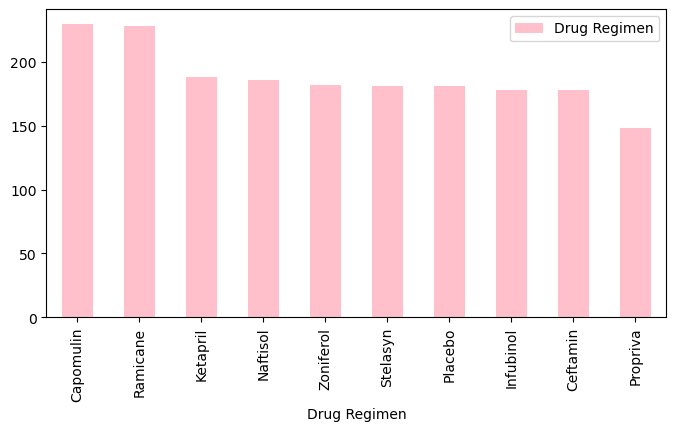

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pmicetime_df = pd.DataFrame({
    "Drug Regimen" : merged_mouse_study_df["Drug Regimen"].value_counts(), 
    "Number of Observed Mouse Timepoints" : summary_stats_df.index
})

pmicetime_df.plot(kind = "bar", figsize = (8, 4), color = "pink");

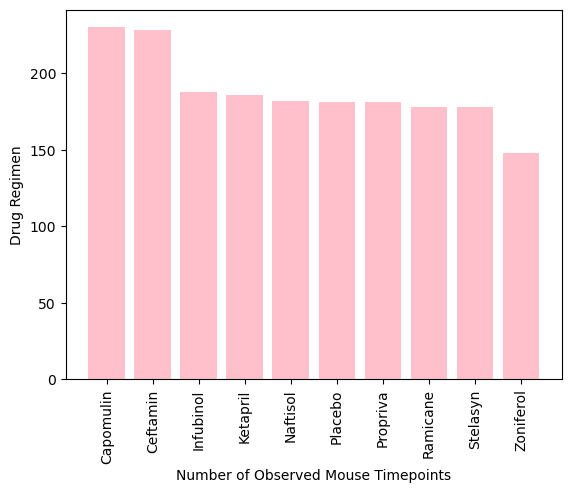

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pan_bar_x = summary_stats_df.index
pan_bar_y = merged_mouse_study_df["Drug Regimen"].value_counts()

plt.bar(pan_bar_x, pan_bar_y, color = "pink", align = "center")

plt.xlabel("Number of Observed Mouse Timepoints")
plt.ylabel("Drug Regimen")

plt.xticks(pan_bar_x, rotation = "vertical");


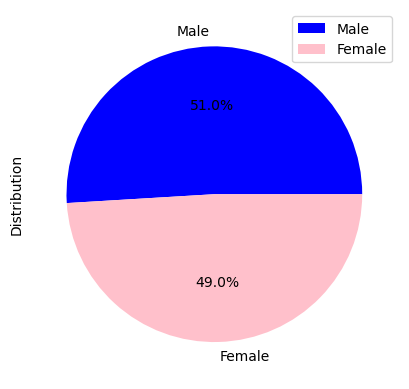

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gen_dist = merged_mouse_study_df["Sex"].value_counts()
mouse_colors = ["blue", "pink"]

pgender_df = pd.DataFrame({
    "Gender" : mouse_gen_dist.index, 
    "Distribution" : merged_mouse_study_df["Sex"].value_counts()
})
pgender_df.plot(kind = "pie", y = "Distribution", autopct = "%1.1f%%", colors = mouse_colors);


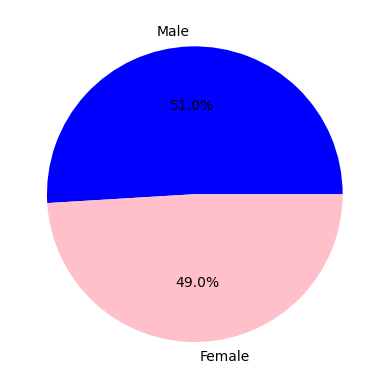

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gen_labels = mouse_gen_dist.index

plt.pie(mouse_gen_dist, labels = mouse_gen_labels, colors = mouse_colors,  autopct = "%1.1f%%");

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
copy_df = merged_mouse_study_df["Mouse ID"]
mice_max_time = copy_df.drop_duplicates(keep = "last")
mice_max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df = merged_mouse_study_df.loc[mice_max_time.index, :]
max_time_drug_df = max_time_df.loc[(max_time_df["Drug Regimen"] == "Capomulin") | (max_time_df["Drug Regimen"] == "Ramicane") |
                                (max_time_df["Drug Regimen"] == "Infubinol") | (max_time_df["Drug Regimen"] == "Ceftamin"), :]
max_time_drug_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [145]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = max_time_drug_df.loc[max_time_drug_df["Drug Regimen"] == "Capomulin"]
ca_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
ca_iqr = ca_quartiles[0.75] - ca_quartiles[0.25]
ca_lower = ca_quartiles[0.25] - (1.50 * ca_iqr)
ca_upper = ca_quartiles[0.75] + (1.50 * ca_iqr)
ca_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] <= ca_lower) | (capomulin_df["Tumor Volume (mm3)"] >= ca_upper)]
ca_outliers

ramicane_df = max_time_drug_df.loc[max_time_drug_df["Drug Regimen"] == "Ramicane"]
ra_quartiles = ramicane_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
ra_iqr = ra_quartiles[0.75] - ra_quartiles[0.25]
ra_lower = ra_quartiles[0.25] - (1.50 * ra_iqr)
ra_upper = ra_quartiles[0.75] + (1.50 * ra_iqr)
ra_outliers = ramicane_df.loc[(ramicane_df["Tumor Volume (mm3)"] <= ra_lower)|(ramicane_df["Tumor Volume (mm3)"] >= ra_upper)]

infubinol_df = max_time_drug_df.loc[max_time_drug_df["Drug Regimen"] == "Infubinol"]
in_quartiles = infubinol_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
in_iqr = in_quartiles[0.75] - in_quartiles[0.25]
in_lower = in_quartiles[0.25] - (1.50 * in_iqr)
in_upper = in_quartiles[0.75] +  (1.50 * in_iqr)
in_outliers = infubinol_df.loc[(infubinol_df["Tumor Volume (mm3)"] <= in_lower) | (infubinol_df["Tumor Volume (mm3)"] >= in_upper)]

ceftamin_df = max_time_drug_df.loc[max_time_drug_df["Drug Regimen"] == "Ceftamin"]
ce_quartiles = ceftamin_df["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
ce_iqr = ce_quartiles[0.75] - ce_quartiles[0.25]
ce_lower = ce_quartiles[0.25] - (1.50 * ce_iqr)
ce_upper = ce_quartiles[0.75] + (1.50 * ce_iqr)
ce_outliers = ceftamin_df.loc[(ceftamin_df["Tumor Volume (mm3)"] <= ce_lower) | (ceftamin_df["Tumor Volume (mm3)"] >= ce_upper)]

print("Capomulin has an",ca_outliers)
print("Ramicane has an", ra_outliers)
print("Infubinol has an", in_outliers)
print("Ceftamin has an", ce_outliers)

Capomulin has an Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Ramicane has an Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Infubinol has an     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
420     c326          5           36.321346                 0    Infubinol   

        Sex  Age_months  Weight (g)  
420  Female          18          25  
Ceftamin has an Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


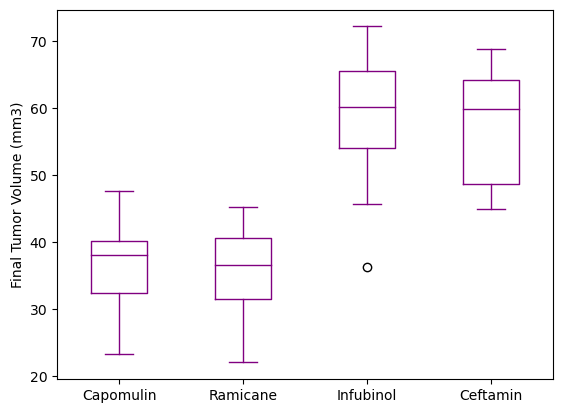

In [156]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
combined_med_df = pd.DataFrame({
    "Capomulin" : capomulin_df["Tumor Volume (mm3)"],
    "Ramicane" : ramicane_df["Tumor Volume (mm3)"], 
    "Infubinol" : infubinol_df["Tumor Volume (mm3)"],
    "Ceftamin" : ceftamin_df["Tumor Volume (mm3)"]
})

combined_med_df.boxplot(color = "purple", grid = False)
plt.ylabel("Final Tumor Volume (mm3)");

## Line and Scatter Plots

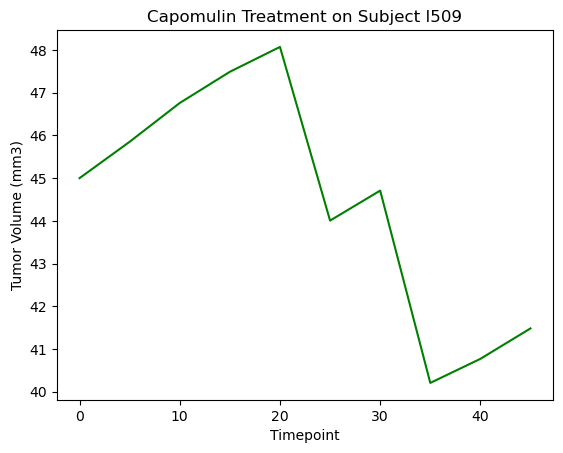

In [167]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse_df = merged_mouse_study_df.loc[merged_mouse_study_df["Mouse ID"] == "l509"]
plt.plot(one_mouse_df["Timepoint"], one_mouse_df["Tumor Volume (mm3)"], color = "green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment on Subject l509");

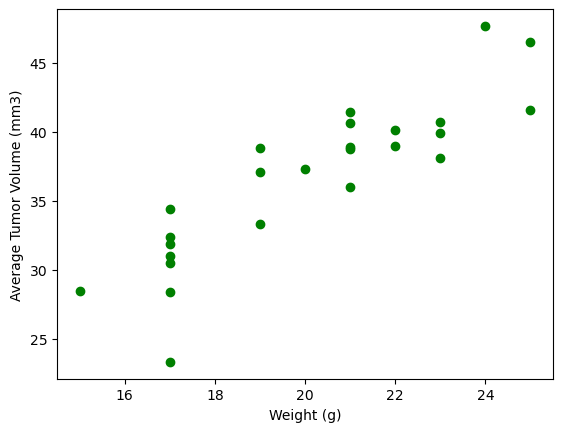

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"], facecolors = "green", edgecolors = "green")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

The correlation between both factors is 0.88


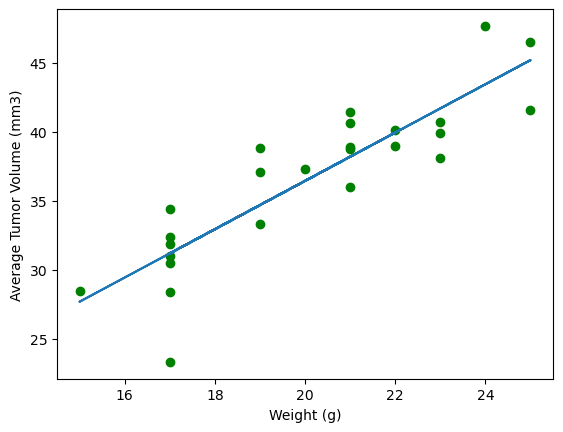

In [191]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_corr = st.pearsonr(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(mouse_corr[0], 2)}")

from scipy.stats import linregress
(slope, intercept, rval, pval, stderr) = linregress(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
regress_vals = slope*capomulin_df["Weight (g)"] + intercept
plt.plot(capomulin_df["Weight (g)"], regress_vals)

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"], facecolors = "green", edgecolors = "green")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");
